In [1]:
import numpy as np
import hmc_v2 as hmc
#import hmc_v3 as hmc
import matplotlib.pyplot as plt
import corner
import time

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-4,4),(-4,4),(-4,4)]
nparam = len(limits)

In [3]:
def mock_posterior_and_gradient(p):
    logP = -0.5 * np.sum(p**2)
    logP_jacobian = p * (-1)
    return logP, logP_jacobian

In [4]:
def run_hmc(n_it, filebase, epsilon, steps_per_iteration):
    #rank = 5
    rank = nparam
    filename = f'{filebase}.{rank}.txt'
    #np.random.seed(100 + rank)
    C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, C, epsilon, steps_per_iteration, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    # continue
    #for i in range(n_it):
        # Save chain
        #chain = np.array(sampler.trace)
        #np.savetxt(filename, chain)

        # next round of samples
        #sampler.sample(n_it)
    
    #chain = np.array(sampler.paths)
    #anti_chain = np.array(sampler.anti_paths)
    
    #tr = np.array(sampler.trace)
    #np.savetxt(filename, chain)
    return sampler

In [5]:
start = time.time()
nit = 100
spit = 150
chain = run_hmc(nit, "hmc_002_500", 0.02, spit)
print("%.2f" %(time.time()-start))

Stopped after 80 steps
Accept 0 alpha=1.00  p=0.71  ΔH=-0.000
Stopped after 80 steps
Accept 1 alpha=1.00  p=0.96  ΔH=-0.000
Stopped after 80 steps
Accept 2 alpha=1.00  p=0.18  ΔH=-0.000
Stopped after 80 steps
Accept 3 alpha=1.00  p=0.05  ΔH=0.000
Stopped after 80 steps
Accept 4 alpha=1.00  p=0.43  ΔH=0.000
Stopped after 80 steps
Accept 5 alpha=1.00  p=0.89  ΔH=0.000
Stopped after 80 steps
Accept 6 alpha=1.00  p=0.22  ΔH=0.000
Stopped after 80 steps
Accept 7 alpha=1.00  p=0.04  ΔH=-0.000
Stopped after 80 steps
Accept 8 alpha=1.00  p=0.74  ΔH=-0.000
Stopped after 80 steps
Accept 9 alpha=1.00  p=0.75  ΔH=0.000
Stopped after 80 steps
Accept 10 alpha=1.00  p=0.42  ΔH=-0.000
Stopped after 80 steps
Accept 11 alpha=1.00  p=0.27  ΔH=0.000
Stopped after 80 steps
Accept 12 alpha=1.00  p=0.72  ΔH=0.000
Stopped after 80 steps
Accept 13 alpha=1.00  p=0.86  ΔH=0.000
Stopped after 80 steps
Accept 14 alpha=1.00  p=0.59  ΔH=-0.000
Stopped after 80 steps
Accept 15 alpha=1.00  p=0.32  ΔH=-0.000
Stopped af

In [6]:
paths = np.array(chain.paths)
anti_paths = np.array(chain.anti_paths)
trace = np.array(chain.trace)

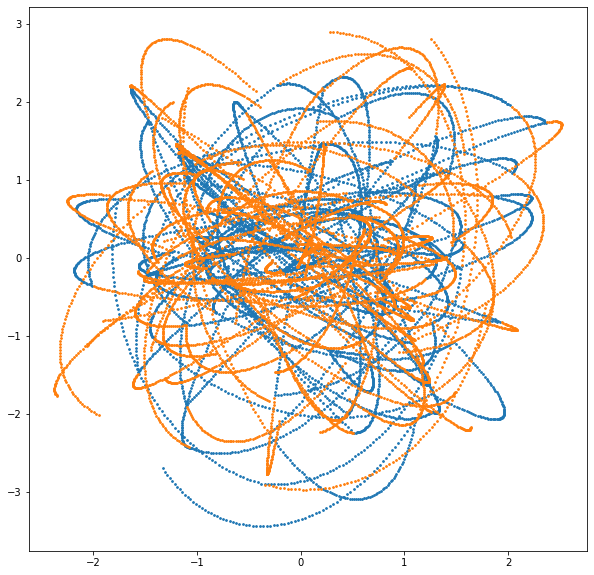

In [7]:
plt.scatter(paths[:,0],paths[:,1],s=3)
plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
plt.show()

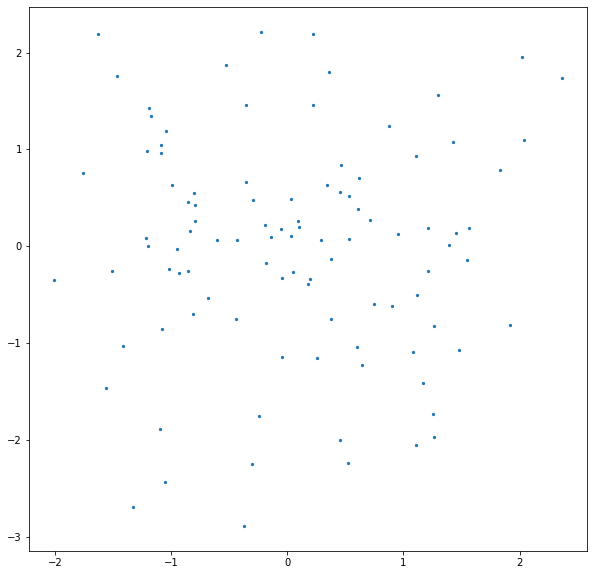

In [8]:
plt.scatter(trace[:,0],trace[:,1],s=5)
plt.show()